Question 1: Data types of each column
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Question 2: Statistical summary after dropping 'id' and 'Unnamed: 0'
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000    

<ipython-input-1-37df4dd21ba6>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
<ipython-input-1-37df4dd21ba6>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

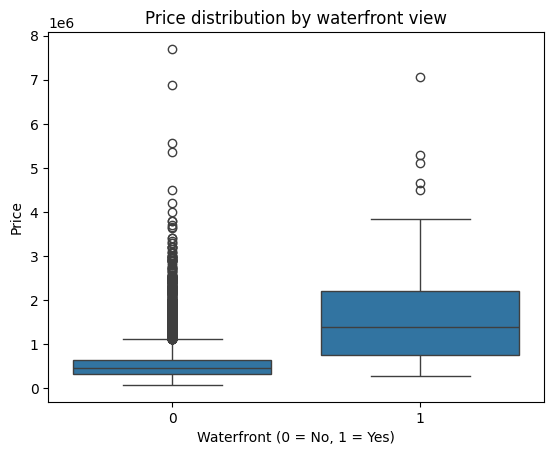

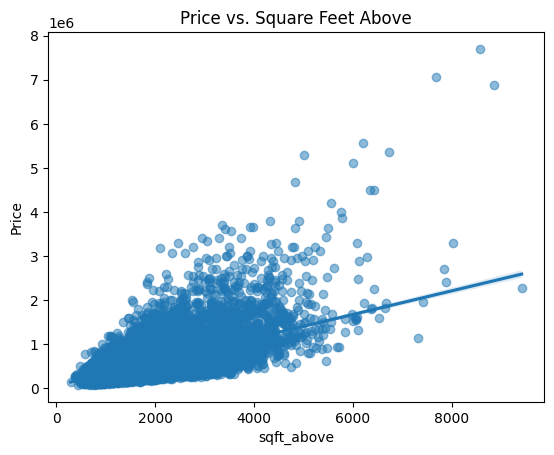

Correlación de cada variable con price:
 sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

La variable más correlacionada con price es: sqft_living con valor 0.7020350546118005
Question 7: Linear Regression R² on test set: 0.6480
Question 8: Pipeline (scale→polynomial→linear) R² on test set: 0.7120

Number of test samples: 3242
Number of training samples: 18371

Question 9: Ridge R² on test set: 0.6480
Question 10: Polynomial Ridge R² on test set: 0.7004


In [ ]:
# %%

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Carga de datos
df = pd.read_csv(r'C:\Users\re_ck\Downloads\kc_house_data.csv')

# ----------------------------
# Pregunta 1: Tipos de datos
print("Question 1: Data types of each column")
print(df.dtypes)

# ----------------------------
# Pregunta 2: Resumen estadístico
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')
print("\nQuestion 2: Statistical summary after dropping 'id' and 'Unnamed: 0'")
print(df.describe())

# Reemplazar NaN en 'bedrooms' y 'bathrooms' por la media
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)

# ----------------------------
# Pregunta 4: Boxplot de 'waterfront' vs 'price'
# Convertir 'waterfront' a tipo categórico
plt.figure()
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price distribution by waterfront view')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

# ----------------------------
# Pregunta 5: Histograma de 'price'
plt.figure()
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha': 0.5})
plt.title('Price vs. Square Feet Above')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

# Asegúrate de haber eliminado date (si no lo hiciste ya en Q2)
df.drop(['date'], axis=1, inplace=True, errors='ignore')
# ----------------------------
# Pregunta 6: Encontrar la característica (distinta de price) con mayor correlación con price
corr_with_price = df.corr()['price'].drop('price').sort_values(ascending=False)
print("Correlación de cada variable con price:\n", corr_with_price)
print("\nLa variable más correlacionada con price es:",
      corr_with_price.idxmax(), "con valor", corr_with_price.max())

# ----------------------------
# Question 7: Ajustar un modelo de Regresión Lineal sobre las mismas características usadas en Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Drop the 'date' column as it is not numeric and cannot be used in the model
df.drop(['date'], axis=1, inplace=True, errors='ignore')

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1
)

lr = LinearRegression()
lr.fit(x_train, y_train)
r2_lr = lr.score(x_test, y_test)
print(f"Question 7: Linear Regression R² on test set: {r2_lr:.4f}")

# ----------------------------
# Question 8: Pipeline con escalado, polinomios y regresión lineal
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale',     StandardScaler()),
    ('polynomial',PolynomialFeatures(degree=2, include_bias=False)),
    ('model',     LinearRegression())
])

pipe.fit(x_train, y_train)
r2_pipe = pipe.score(x_test, y_test)
print(f"Question 8: Pipeline (scale→polynomial→linear) R² on test set: {r2_pipe:.4f}")

# ----------------------------
# Preparación de datos para el modelado
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

print(f"\nNumber of test samples: {x_test.shape[0]}")
print(f"Number of training samples: {x_train.shape[0]}")

# ----------------------------
# Pregunta 9: Regresión Ridge
# Normalizar los datos
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
print(f"\nQuestion 9: Ridge R² on test set: {ridge.score(x_test, y_test):.4f}")

# ----------------------------
# Pregunta 10: Regresión Ridge con características polinómicas
# Generar características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
print(f"Question 10: Polynomial Ridge R² on test set: {ridge_poly.score(X_test_poly, y_test):.4f}")